## Telecom Customer Churn Case Study

### Business Goal
 Telecom Industry experiences an average of 15-20% annual churn rate. Given the fact that it costs 5 - 10% times more to acquire new customers than reatin the existing customers. Customer retention is more important and for many incumbent operators, retaining high profitable customers is the number one business goal.
 
####  Understanding customer behaviour during churn
 To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
 
 

### Step 1: Reading and Understanding the Data

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Until fuction: line seperator
def print_ln():
    print('-'*80, '\n')
    
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

# Load csv data file
telecom_orig = pd.read_csv('telecom_churn_data.csv', low_memory=False)

In [3]:
# Understand the properties of loaded dataframe
telecom = telecom_orig.copy()
print('Dataframe Shape: ', telecom.shape); print_ln();
print("Dataframe Info: \n"); telecom.info(); print_ln();
telecom.head(5)

Dataframe Shape:  (99999, 226)
-------------------------------------------------------------------------------- 

Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
-------------------------------------------------------------------------------- 



,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,na

In [4]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.00,99999.00,98981.00,98981.00,98981.00,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.

### Step 2 - Treating Categorical Variables
There are 8 of them and all of these have more than 60% missing values. Missing values can be imputed with '-1' where -1 can be treated as a new category.

#### CATEGORICAL VARIABLES:
1. night_pck_user_6
2. night_pck_user_7
3. night_pck_user_8
4. night_pck_user_9
5. fb_user_6
6. fb_user_7
7. fb_user_8
8. fb_user_9

In [5]:
# Missing values can be computed as -1
# where -1 is treated as a separate category

categorical_vars = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", 
 "fb_user_6", "fb_user_7", "fb_user_8"]

for var in categorical_vars:
    telecom[var].fillna(value=-1, inplace=True)

In [6]:
# Create dummy variables for all the eight categorial variables
night_pck_user_6_s = pd.get_dummies(telecom['night_pck_user_6'],prefix="night6",drop_first=True)
night_pck_user_7_s = pd.get_dummies(telecom['night_pck_user_7'],prefix="night7",drop_first=True)
night_pck_user_8_s = pd.get_dummies(telecom['night_pck_user_8'],prefix="night8",drop_first=True)


fb_user_6_s = pd.get_dummies(telecom['fb_user_6'],prefix="fb6", drop_first=True)
fb_user_7_s = pd.get_dummies(telecom['fb_user_7'],prefix="fb7",drop_first=True)
fb_user_8_s = pd.get_dummies(telecom['fb_user_8'],prefix="fb8",drop_first=True)


telecom = pd.concat([telecom,night_pck_user_6_s],axis=1)
telecom = pd.concat([telecom,night_pck_user_7_s],axis=1)
telecom = pd.concat([telecom,night_pck_user_8_s],axis=1)


telecom = pd.concat([telecom,fb_user_6_s],axis=1)
telecom = pd.concat([telecom,fb_user_7_s],axis=1)
telecom = pd.concat([telecom,fb_user_8_s],axis=1)


# drop all categorial columns
telecom = telecom.drop(['fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9'], 1)

### Step 3 - Missing values Treatment
1. Impute the missing values 
  a. Impute by a simple statistic: Replace the missing values by another value, commonly the mean, median, mode etc.
  b. Predictive Techniques - Use statistical model such as K-NN and SVM etc., to predict and impute missing values

#### a. Columnwise missing values

In [7]:
# summing up the missing values (column-wise)
telecom.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [8]:
# Percentage of missing values (column-wise)
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

mobile_number               0.00
circle_id                   0.00
loc_og_t2o_mou              1.02
std_og_t2o_mou              1.02
loc_ic_t2o_mou              1.02
last_date_of_month_6        0.00
last_date_of_month_7        0.60
last_date_of_month_8        1.10
last_date_of_month_9        1.66
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
arpu_9                      0.00
onnet_mou_6                 3.94
onnet_mou_7                 3.86
onnet_mou_8                 5.38
onnet_mou_9                 7.75
offnet_mou_6                3.94
offnet_mou_7                3.86
offnet_mou_8                5.38
offnet_mou_9                7.75
roam_ic_mou_6               3.94
roam_ic_mou_7               3.86
roam_ic_mou_8               5.38
roam_ic_mou_9               7.75
roam_og_mou_6               3.94
roam_og_mou_7               3.86
roam_og_mou_8               5.38
roam_og_mou_9               7.75
loc_og_t2t_mou_6            3.94
loc_og_t2t

In [9]:
# Columns with more than 70% missing values
colmns_missing_data = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
colmns_missing_data[colmns_missing_data >= 70]

date_of_last_rech_data_6   74.85
date_of_last_rech_data_7   74.43
date_of_last_rech_data_8   73.66
date_of_last_rech_data_9   74.08
total_rech_data_6          74.85
total_rech_data_7          74.43
total_rech_data_8          73.66
total_rech_data_9          74.08
max_rech_data_6            74.85
max_rech_data_7            74.43
max_rech_data_8            73.66
max_rech_data_9            74.08
count_rech_2g_6            74.85
count_rech_2g_7            74.43
count_rech_2g_8            73.66
count_rech_2g_9            74.08
count_rech_3g_6            74.85
count_rech_3g_7            74.43
count_rech_3g_8            73.66
count_rech_3g_9            74.08
av_rech_amt_data_6         74.85
av_rech_amt_data_7         74.43
av_rech_amt_data_8         73.66
av_rech_amt_data_9         74.08
arpu_3g_6                  74.85
arpu_3g_7                  74.43
arpu_3g_8                  73.66
arpu_3g_9                  74.08
arpu_2g_6                  74.85
arpu_2g_7                  74.43
arpu_2g_8 

In [10]:
# Treat missing values
# Columns used for filtering high-value customers, can't be dropped
# total_rech_data_6 
# total_rech_data_7 
# av_rech_amt_data_6 
# av_rech_amt_data_7 

# All these columns has more than 70% missing values

print(telecom.total_rech_data_6.describe()); print_ln()
print(telecom.total_rech_data_7.describe()); print_ln()
print(telecom.av_rech_amt_data_6.describe()); print_ln()
print(telecom.av_rech_amt_data_7.describe()); print_ln()

count   25153.00
mean        2.46
std         2.79
min         1.00
25%         1.00
50%         1.00
75%         3.00
max        61.00
Name: total_rech_data_6, dtype: float64
-------------------------------------------------------------------------------- 

count   25571.00
mean        2.67
std         3.03
min         1.00
25%         1.00
50%         1.00
75%         3.00
max        54.00
Name: total_rech_data_7, dtype: float64
-------------------------------------------------------------------------------- 

count   25153.00
mean      192.60
std       192.65
min         1.00
25%        82.00
50%       154.00
75%       252.00
max      7546.00
Name: av_rech_amt_data_6, dtype: float64
-------------------------------------------------------------------------------- 

count   25571.00
mean      200.98
std       196.79
min         0.50
25%        92.00
50%       154.00
75%       252.00
max      4365.00
Name: av_rech_amt_data_7, dtype: float64
---------------------------------------------

(array([1.4539e+04, 8.0550e+03, 1.8810e+03, 4.6500e+02, 3.0400e+02,
        1.4100e+02, 4.4000e+01, 4.4000e+01, 3.8000e+01, 1.3000e+01,
        1.3000e+01, 1.0000e+01, 7.0000e+00, 6.0000e+00, 4.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([5.00000e-01, 1.75080e+02, 3.49660e+02, 5.24240e+02, 6.98820e+02,
        8.73400e+02, 1.04798e+03, 1.22256e+03, 1.39714e+03, 1.57172e+03,
        1.74630e+03, 1.92088e+03, 2.09546e+03, 2.27004e+03, 2.44462e+03,
        2.61920e+03, 2.79378e+03, 2.96836e+03, 3.14294e+03, 3.31752e+03,
        3.49210e+03, 3.66668e+03, 3.84126e+03, 4.01584e+03, 4.19042e+03,
        4.36500e+03]),
 <a list of 25 Patch objects>)

<Figure size 432x288 with 0 Axes>

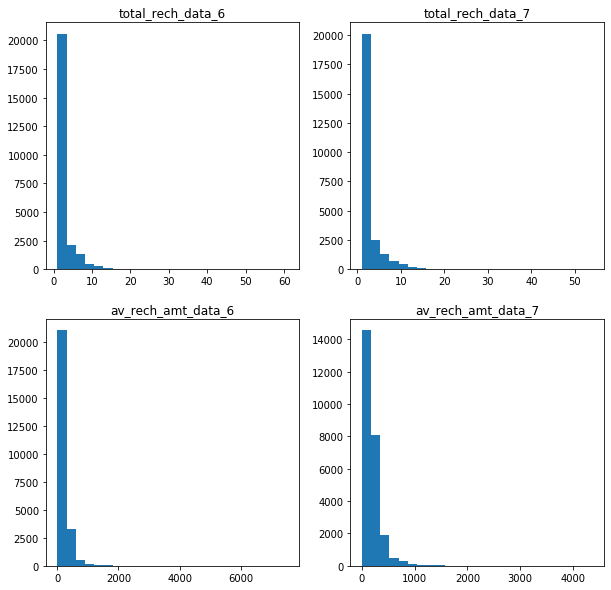

In [11]:
# Let us look at the distribution to find out the value to fill
# total_rech_data_6
plt.figure(1)
fig, ax = plt.subplots(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("total_rech_data_6")
plt.hist(telecom.total_rech_data_6.dropna(),bins=25)

# total_rech_data_7
plt.subplot(2,2,2)
plt.title("total_rech_data_7")
plt.hist(telecom.total_rech_data_7.dropna(),bins=25)

# av_rech_amt_data_6
plt.subplot(2,2,3)
plt.title("av_rech_amt_data_6")
plt.hist(telecom.av_rech_amt_data_6.dropna(),bins=25)

# total_rech_data_7
plt.subplot(2,2,4)
plt.title("av_rech_amt_data_7")
plt.hist(telecom.av_rech_amt_data_7.dropna(),bins=25)

In [12]:
# Here the minimum value is 1 or 0.5, and not zero, 
# missing -- indicates that no recharge was done in that month. 
# Thus, missing values can be imputed with 0.

telecom.total_rech_data_6.fillna(value=0, inplace=True)
telecom.total_rech_data_7.fillna(value=0, inplace=True)
telecom.total_rech_data_8.fillna(value=0, inplace=True)
telecom.total_rech_data_9.fillna(value=0, inplace=True)

telecom.av_rech_amt_data_6.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_7.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_8.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_9.fillna(value=0, inplace=True)

In [13]:
# Column analysis % of missing values
print(round(100*(telecom.isnull().sum()/len(telecom.index)), 2)); print_ln()

# Columns with more than 70% missing values
columns_missing_data = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
print(columns_missing_data[columns_missing_data > 70])

mobile_number               0.00
circle_id                   0.00
loc_og_t2o_mou              1.02
std_og_t2o_mou              1.02
loc_ic_t2o_mou              1.02
last_date_of_month_6        0.00
last_date_of_month_7        0.60
last_date_of_month_8        1.10
last_date_of_month_9        1.66
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
arpu_9                      0.00
onnet_mou_6                 3.94
onnet_mou_7                 3.86
onnet_mou_8                 5.38
onnet_mou_9                 7.75
offnet_mou_6                3.94
offnet_mou_7                3.86
offnet_mou_8                5.38
offnet_mou_9                7.75
roam_ic_mou_6               3.94
roam_ic_mou_7               3.86
roam_ic_mou_8               5.38
roam_ic_mou_9               7.75
roam_og_mou_6               3.94
roam_og_mou_7               3.86
roam_og_mou_8               5.38
roam_og_mou_9               7.75
loc_og_t2t_mou_6            3.94
loc_og_t2t

In [14]:
drop_missing_values_columns = columns_missing_data[columns_missing_data > 70].index
telecom.drop(drop_missing_values_columns, axis=1, inplace=True)

print('Number of columns droped here  = ', len(drop_missing_values_columns))
print('Dataframe Shape: ', telecom.shape)

Number of columns droped here  =  24
Dataframe Shape:  (99999, 206)


### b. Filter High value customers

In [15]:
# New DERIVED Columns for Total Data Recharge Amount

telecom["total_rech_data_amt_6"] = telecom["total_rech_data_6"]*telecom['av_rech_amt_data_6']
telecom["total_rech_data_amt_7"] = telecom["total_rech_data_7"]*telecom['av_rech_amt_data_7']
telecom["total_rech_data_amt_8"] = telecom["total_rech_data_8"]*telecom['av_rech_amt_data_8']
telecom["total_rech_data_amt_9"] = telecom["total_rech_data_9"]*telecom['av_rech_amt_data_9']

# We can drop total_rech_data_* and av_rech_amt_data_*
drop_data_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
telecom.drop(drop_data_columns, axis=1, inplace=True)

In [16]:
# Filter high-value customers
avg_rech_amt_6_7 = (telecom["total_rech_amt_6"] + telecom["total_rech_data_amt_6"] + 
                      telecom["total_rech_amt_7"] + telecom["total_rech_data_amt_7"]) / 2.0
amont_70_pc = np.percentile(avg_rech_amt_6_7, 70.0)
print('70 percentile of first two months avg recharge amount: ', amont_70_pc)

telecom = telecom[avg_rech_amt_6_7 >= amont_70_pc]
print('Dataframe Shape: ', telecom.shape)

70 percentile of first two months avg recharge amount:  478.0
Dataframe Shape:  (30001, 202)


### c. Identify churn and Tag churners

In [17]:
# Identify Churn
X = telecom["total_ic_mou_9"] + telecom["total_og_mou_9"] + telecom["vol_2g_mb_9"] + telecom["vol_3g_mb_9"]
telecom["churn"] = np.where(X, 0, 1)

# Columns to be dropped: all columns ending with "_9"
drop_fourth_month_columns = [hdr for hdr in list(telecom) if hdr.endswith("_9")]
drop_fourth_month_columns += ["sep_vbc_3g"]
telecom.drop(drop_fourth_month_columns, axis=1, inplace=True)

print('Number of columns droped here  = ', len(drop_fourth_month_columns))
print('Dataframe Shape: ', telecom.shape); print_ln();

Number of columns droped here  =  46
Dataframe Shape:  (30001, 157)
-------------------------------------------------------------------------------- 



In [18]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,night6_0.0,night6_1.0,night7_0.0,night7_1.0,night8_0.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,197.38,214.82,213.80,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,4.13,nan,nan,1.15,nan,nan,5.44,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,0.00,0.00,5.44,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1,0,1,0,1,0,0,1,0,1,0,1,252.00,252.00,252.00,1
7,7000701601,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.00,0.00,0.00,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.00,0.00,0.00,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1
8,7001524846,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0

### d. Identify columns that has no variance and drop

In [19]:
# Identify columns that have no variance
telecom_unique_count = telecom.nunique().sort_values(ascending=False)

# Identify bad colums that has no infromation (all entries are NA or same)
# Find columns with all NULL entries and add to drop_columns list
telecom_unique_count_is_zero = telecom_unique_count[telecom_unique_count == 0]
print("Dataframe Unique Value Count is ZERO (all null values): \n", telecom_unique_count_is_zero); print_ln();
drop_no_variance_columns = list(telecom_unique_count_is_zero.index)

# Find columns with all same entries and add to drop_columns list
telecom_unique_count_is_one = telecom_unique_count[telecom_unique_count == 1]
print("Dataframe Unique Value Count is ONE (all same values): \n", telecom_unique_count_is_one); print_ln();
drop_no_variance_columns += list(telecom_unique_count_is_one.index)

telecom.drop(drop_no_variance_columns, axis=1, inplace=True)

print('Dataframe Shape: ', telecom.shape); print_ln();
print('Number of columns dropped here  = ', len(drop_no_variance_columns))
print('Dataframe Shape: ', telecom.shape); print_ln();

Dataframe Unique Value Count is ZERO (all null values): 
 Series([], dtype: int64)
-------------------------------------------------------------------------------- 

Dataframe Unique Value Count is ONE (all same values): 
 last_date_of_month_7    1
circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
std_ic_t2o_mou_6        1
last_date_of_month_8    1
std_ic_t2o_mou_7        1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_ic_t2o_mou_8        1
dtype: int64
-------------------------------------------------------------------------------- 

Dataframe Shape:  (30001, 144)
-------------------------------------------------------------------------------- 

Number of columns dropped here  =  13
Dataframe Shape:  (30001, 144)
-------------------------------------------------------------------------------- 



In [20]:
telecom.head(5)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,night6_0.0,night6_1.0,night7_0.0,night7_1.0,night8_0.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn
0,7000842753,197.38,214.82,213.80,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,4.13,nan,nan,1.15,nan,nan,5.44,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,0.00,0.00,5.44,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1,0,1,0,1,0,0,1,0,1,0,1,252.00,252.00,252.00,1
7,7000701601,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1
8,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,

#### e. Rowwise missing values

In [21]:
# sum it up to check how many rows have all missing values
print("Rows with all NULL values =",  telecom.isnull().all(axis=1).sum())

# sum of misisng values in each row
rows_missing_data = telecom.isnull().sum(axis=1)
rows_missing_data[rows_missing_data > 0]

Rows with all NULL values = 0


0        54
77       27
91        1
111      27
188      28
191       1
358      27
364      27
414      28
423      27
527      27
539      54
588       1
603       2
679       1
687      82
690      28
723      28
788      27
845      28
895      27
933      27
934      27
1138     54
1255     27
1374      1
1489     54
1500     55
1524     28
1555     56
1623     27
1754     27
1768     27
1877     27
1913      1
1952     28
2063     27
2185     81
2197     28
2218     55
2285     81
2352     28
2452     27
2516     54
2533     27
2572     27
2719     27
2750     27
2777      1
3154     81
3289     54
3290     81
3310     27
3364     27
3416     27
3444     54
3468     81
3511     27
3523     55
3543     27
3564     27
3667     28
3696     27
3719     27
3734     27
3754     54
3757      1
3854     28
3865     28
3878     27
4190     83
4284      1
4402     27
4414     28
4439     27
4810     28
4814      1
4820     54
4838     81
4934      1
4960     29
4996     27
5025     27
5074

In [22]:
# small percentage of rows has more than or equal to 27 missing values
drop_rows = telecom.isnull().sum(axis=1) >= 27
print("Number of rows with >= 27 missing values = {}".format(drop_rows.sum()))
print("     % of rows with >= 27 missing values = {} %".format(drop_rows.sum()/telecom.shape[0]*100))

# drop rows with missing values greater >= 27
telecom = telecom[telecom.isnull().sum(axis=1) < 27]
print('Dataframe Shape after dropping rows: ', telecom.shape); print_ln();

Number of rows with >= 27 missing values = 1497
     % of rows with >= 27 missing values = 4.989833672210926 %
Dataframe Shape after dropping rows:  (28504, 144)
-------------------------------------------------------------------------------- 



In [23]:
rows_missing_data = telecom.isnull().sum(axis=1)
#print(rows_missing_data)
print(rows_missing_data[rows_missing_data > 0])

91       1
191      1
588      1
603      2
679      1
1374     1
1913     1
2777     1
3757     1
4284     1
4814     1
4934     1
5187     1
5449     1
5798     1
5926     1
7304     1
7399     1
7567     1
7662     1
7914     1
8118     1
8159     1
8281     1
8454     1
8680     1
8979     1
9012     1
9027     1
9068     1
9086     1
9116     1
9365     1
9773     1
9807     1
10238    1
10386    1
10863    1
10869    1
11117    1
11550    1
11812    1
11954    1
12127    1
12414    1
12428    1
12522    1
12635    1
12701    1
12897    1
13012    1
13764    1
13837    1
14039    2
14920    1
15318    1
15648    2
15972    1
16195    1
16365    1
17020    1
17070    1
17121    1
17386    1
18016    1
18154    1
18546    1
18855    1
18908    1
20503    1
20541    1
20628    1
20729    1
21142    1
21468    1
21537    1
21753    1
21857    1
21923    1
22097    1
22118    1
22158    1
22229    1
23456    1
23795    1
23862    1
24490    1
24823    1
25091    1
25215    1
25540    1

In [24]:
# Missing Values Treatment: continue
# look at the COLUMN summary again
df = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
df[df > 0]

date_of_last_rech_6   0.12
date_of_last_rech_7   0.18
date_of_last_rech_8   0.97
dtype: float64

Now, missed values in date columns


### f. Fix dates and impute with meaningful numbers

In [25]:
# convert date columns to python datetime format
date_vars = ["date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8"]
telecom[date_vars].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
7,6/27/2014,7/25/2014,8/26/2014
8,6/25/2014,7/31/2014,8/30/2014
21,6/30/2014,7/31/2014,8/31/2014
23,6/18/2014,7/7/2014,8/24/2014
33,6/30/2014,7/30/2014,8/26/2014


In [26]:
# convert to datetime
for col in date_vars:
    telecom[col] = pd.to_datetime(telecom[col])

print(telecom[date_vars].info())
telecom[date_vars].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_of_last_rech_6  28471 non-null  datetime64[ns]
 1   date_of_last_rech_7  28452 non-null  datetime64[ns]
 2   date_of_last_rech_8  28228 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 890.8 KB
None


,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
7,2014-06-27,2014-07-25,2014-08-26
8,2014-06-25,2014-07-31,2014-08-30
21,2014-06-30,2014-07-31,2014-08-31
23,2014-06-18,2014-07-07,2014-08-24
33,2014-06-30,2014-07-30,2014-08-26


In [27]:
# Create new days columns, instead of date
import datetime
last_date_of_month_6 = datetime.datetime.strptime("30-06-2014", "%d-%m-%Y")
last_date_of_month_7 = datetime.datetime.strptime("31-07-2014", "%d-%m-%Y")
last_date_of_month_8 = datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")

telecom["rech_days_left_6"]      = (last_date_of_month_6 - telecom.date_of_last_rech_6).astype('timedelta64[D]')
telecom["rech_days_left_7"]      = (last_date_of_month_7 - telecom.date_of_last_rech_7).astype('timedelta64[D]')
telecom["rech_days_left_8"]      = (last_date_of_month_8 - telecom.date_of_last_rech_8).astype('timedelta64[D]')

day_columns = ["rech_days_left_6", "rech_days_left_7", "rech_days_left_8"]

print(telecom[day_columns].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rech_days_left_6  28471 non-null  float64
 1   rech_days_left_7  28452 non-null  float64
 2   rech_days_left_8  28228 non-null  float64
dtypes: float64(3)
memory usage: 890.8 KB
None


In [28]:
# Drop all old date columns: add dates columns to drop_column list
telecom.drop(date_vars, axis=1, inplace=True)
telecom1 = telecom.copy()

print('Number of columns droped here  = ', len(date_vars))
print('Dataframe Shape: ', telecom.shape)

Number of columns droped here  =  3
Dataframe Shape:  (28504, 144)


In [29]:
# Missing Values Treatment: continue
# look at the COLUMN summary again
df = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
df[df > 0]

rech_days_left_6   0.12
rech_days_left_7   0.18
rech_days_left_8   0.97
dtype: float64

In [30]:
telecom[['rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8']].describe()

,rech_days_left_6,rech_days_left_7,rech_days_left_8
count,28471.00,28452.00,28228.00
mean,3.39,3.49,4.15
std,4.49,4.29,5.10
min,0.00,0.00,0.00
25%,0.00,0.00,1.00
50%,2.00,2.00,3.00
75%,4.00,5.00,6.00
max,29.00,30.00,30.00


In [31]:
# Mean & Median are different: imputing with median value for recharge days left 
telecom.loc[np.isnan(telecom['rech_days_left_6']), ['rech_days_left_6']] = telecom['rech_days_left_6'].median()
telecom.loc[np.isnan(telecom['rech_days_left_7']), ['rech_days_left_7']] = telecom['rech_days_left_7'].median()
telecom.loc[np.isnan(telecom['rech_days_left_8']), ['rech_days_left_8']] = telecom['rech_days_left_8'].median()

print("\nTotal Number of missing values in the data frame = {}".format(telecom.isnull().sum().sum()))
print('Dataframe Shape: ', telecom.shape); print_ln();


Total Number of missing values in the data frame = 0
Dataframe Shape:  (28504, 144)
-------------------------------------------------------------------------------- 



### Outlier Assessment

Use data distribution to find outliers

In [32]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,night6_0.0,night6_1.0,night7_0.0,night7_1.0,night8_0.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,rech_days_left_6,rech_days_left_7,rech_days_left_8
count,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00
mean,7001213864.75,560.38,570.63,526.06,265.25,275.93,244.73,379.89,389.85,350.23,16.27,12.92,13.03,26.83,20.53,20.75,87.10,89.17,81.99,167.77,169.07,159.16,6.55,6.66,6.16,1.60,1.92,1.78,261.43,264.91,247.32,167.66,178.72,154.81,180.72,192.97,163.99,1.84,1.88,1.66,350.22,373.57,320.45,2.01,2.06,1.97,5.88,7.28,6.84,0.67,0.04,0.06,620.22,647.88,576.65,67.13,69.19,65.74,154.33,157.32,153.46,15.75,16.67,15.11,237.23,243.19,234.33,15.07,15.89,14.53,29.76,31.88,29.23,2.76,2.90,2.68,47.59,50.68,46.44,296.82,307.51,293.43,0.06,0.02,0.03,10.76,12.06,11.35,1.17,1.55,1.28,11.97,11.96,10.33,663.43,672.15,604.78,167.78,171.25,163.32,99.49,100.73,94.22,127.07,127.01,108.7

In [33]:
print('Original Dataframe Shape: ', telecom_orig.shape); print_ln();
print("Original Dataframe Info: \n"); telecom_orig.info(); print_ln();
print("Original Dataframe Nulls:", telecom_orig.isnull().sum().sum()); print_ln();

print('Cleaned Dataframe Shape: ', telecom.shape); print_ln();
print("Cleaned Dataframe Info: \n"); telecom.info(); print_ln();
print("Cleaned Dataframe Nulls:", telecom.isnull().sum().sum()); print_ln();

Original Dataframe Shape:  (99999, 226)
-------------------------------------------------------------------------------- 

Original Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
-------------------------------------------------------------------------------- 

Original Dataframe Nulls: 3594931
-------------------------------------------------------------------------------- 

Cleaned Dataframe Shape:  (28504, 144)
-------------------------------------------------------------------------------- 

Cleaned Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Columns: 144 entries, mobile_number to rech_days_left_8
dtypes: float64(105), int32(1), int64(26), uint8(12)
memory usage: 29.1 MB
-------------------------------------------------------------------------------- 

Cleaned Dataframe 

### Data Analysis

1. Univariate Analysis
2. Bivariate Analysis
3. Check imbalance

#### Dependent Variable: check data imbalance

In [34]:
#checking whether data is imbalanced or not
churn  = telecom["churn"].value_counts()
churn_rate = churn[1]/(churn[1] + churn[0])

print("Total Churn Count     = {}".format(churn[1]))
print("Total Non-Churn Count = {}".format(churn[0]))
print("Churn Rate            = {:.2f}%".format(churn_rate*100))
print_ln()

Total Churn Count     = 1596
Total Non-Churn Count = 26908
Churn Rate            = 5.60%
-------------------------------------------------------------------------------- 



OBSERVATION: Data is highly imbalanced, we need to balance it before we can create the model


### Univariate Analysis on 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'

In [35]:
df_non_churn = telecom[telecom["churn"] == 0]
df_churn     = telecom[telecom["churn"] == 1]

In [36]:
#claculation of mean for churn or non churn
print("Mean:")
print(np.mean(df_non_churn["total_rech_num_6"]))
print(np.mean(df_churn["total_rech_num_6"]))
print("median:")
print(np.median(df_non_churn["total_rech_num_6"]))
print(np.median(df_churn["total_rech_num_6"]))

print("Quantiles:")
print(np.percentile(df_non_churn["total_rech_num_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_6"],np.arange(0,100,25)))


Mean:
11.826036866359447
14.31704260651629
median:
9.0
12.0
Quantiles:
[ 0.  6.  9. 14.]
[ 0.  8. 12. 18.]


### Correlation matrix - Bivariate Analysis

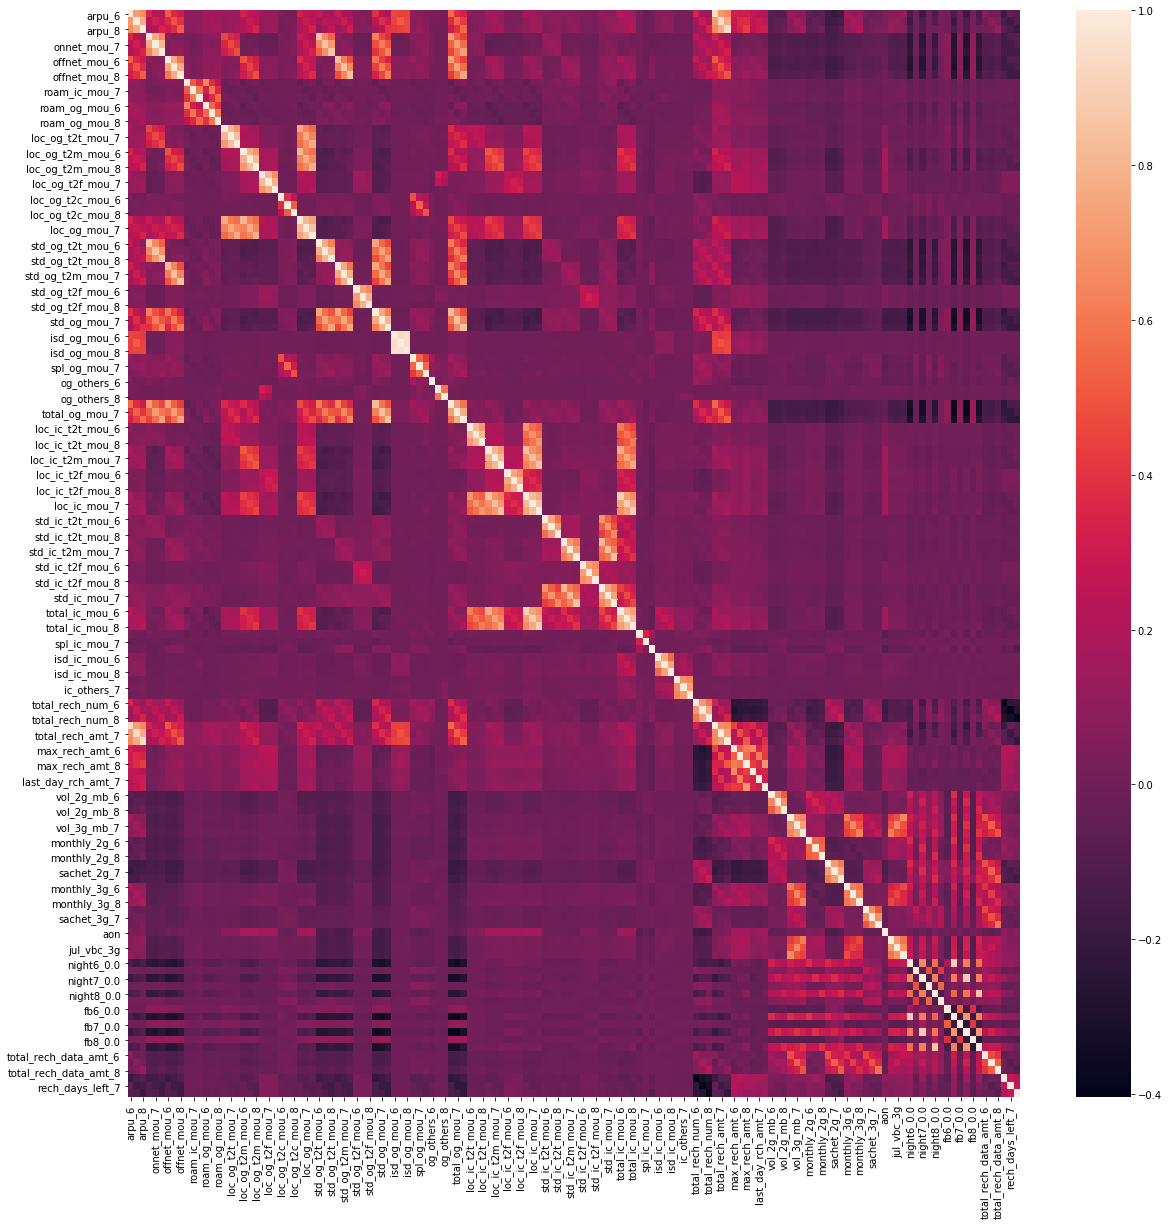

In [37]:
telecom2 = telecom.drop(['mobile_number', 'churn'], axis=1)

# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(telecom2.corr())

In [38]:
corr_matrix = telecom2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.80)]

print("HIGHLY CORRELATED FEATURES IN DATA SET:{}\n\n{}".format(len(high_corr_features), high_corr_features))

HIGHLY CORRELATED FEATURES IN DATA SET:36

['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'fb6_1.0', 'fb7_1.0', 'fb8_1.0']


#### Observations:

1. Data is highly imbalanced, only 5.6% is churn & remaining data is not in churn
2. From Univariate analysis, some relationship is emerging to churn, but no clear relationship found
3. There any many highly correlated features, found 38 features with more than 0.8 correlation

#### Next steps:
1. Need to apply suitable balancing method
2. Features are highly correlated, using Feature reduction methodologies reduce correlation before modelling

In [39]:
# drop member id and phone no

telecom = telecom.drop(['mobile_number'], axis=1)

# Create X (independent variable) & y (dependent variable) 
df_telecom = telecom.drop(['churn'], axis=1)
X = telecom.drop(['churn'], axis=1)
y = telecom['churn']

In [40]:
X.shape

(28504, 142)

### Data Standardisation/Normalization

In [41]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

#### Split data into Train & Test

In [42]:
# Split in train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [43]:
print("X_train Dataframe Shape {}".format(X_train.shape))
print("X_test Dataframe Shape {}".format(X_test.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imb))
print("Imbalance in Test Data: {}".format(y_test_imb))

X_train Dataframe Shape (19952, 142)
X_test Dataframe Shape (8552, 142)
Imbalance in Train Data: 0.05941698083151914
Imbalance in Test Data: 0.059071207430340555


In [44]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)
np.count_nonzero(y_tr)

(37666, 142)
(37666,)


18833

### Applying PCA

In [45]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_tr)

PCA(random_state=100)

In [46]:
df_train_pca = pca.fit_transform(X_tr)
print(df_train_pca.shape)

df_test_pca = pca.transform(X_test)
print(df_test_pca.shape)

(37666, 142)
(8552, 142)


### Apply Logistic Regression

In [47]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(df_train_pca, y_tr)

# Predicted probabilities
y_pred = logsk.predict(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

D:\Anaconda1\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [48]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[6654 1421]
 [  89  388]]


In [49]:
print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred))

LogisticRegression accuracy with PCA:  0.8234331150608045


In [50]:
pca.components_

array([[ 1.49515498e-01,  1.52534942e-01,  1.04554273e-01, ...,
        -7.03572309e-02, -5.44338458e-02, -3.96858805e-02],
       [ 9.23368413e-02,  1.13402732e-01,  1.54498099e-01, ...,
         2.20637198e-02, -1.13460600e-02, -1.80914855e-02],
       [ 8.33719275e-02,  7.56602657e-02,  7.37648514e-02, ...,
         2.60515806e-02,  3.27283841e-02,  1.73706558e-03],
       ...,
       [ 2.66264916e-16,  2.29352945e-16, -1.18986742e-16, ...,
        -1.75651449e-17,  4.92489372e-17,  5.64139425e-17],
       [ 0.00000000e+00, -2.46131857e-17, -1.22053103e-16, ...,
        -1.00335362e-17,  2.18436149e-17,  2.68902355e-17],
       [ 0.00000000e+00,  1.05505722e-16,  3.53965676e-16, ...,
         1.28980041e-16,  3.73915916e-16, -2.77203044e-16]])

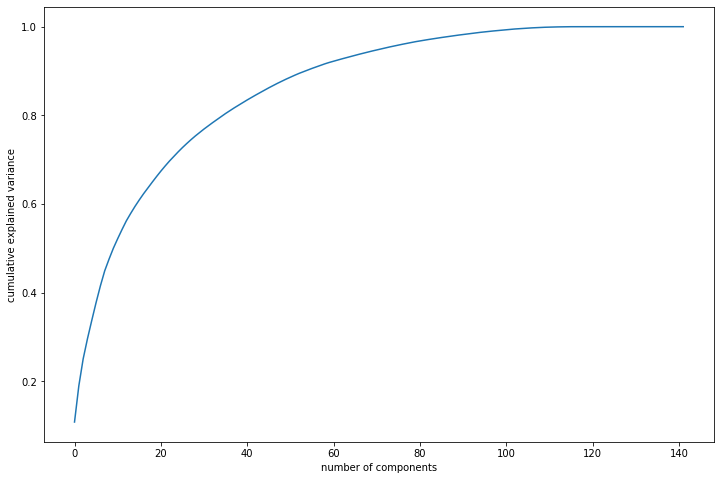

In [51]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


In [52]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([10.81, 18.98, 25.04, 29.6 , 33.75, 37.78, 41.55, 44.94, 47.57,
       50.03, 52.18, 54.24, 56.2 , 57.87, 59.45, 60.92, 62.32, 63.64,
       64.92, 66.19, 67.41, 68.57, 69.69, 70.73, 71.75, 72.72, 73.64,
       74.52, 75.36, 76.15, 76.91, 77.64, 78.35, 79.05, 79.74, 80.41,
       81.05, 81.68, 82.28, 82.87, 83.46, 84.03, 84.58, 85.13, 85.67,
       86.2 , 86.71, 87.21, 87.68, 88.15, 88.6 , 89.03, 89.45, 89.83,
       90.2 , 90.57, 90.93, 91.28, 91.61, 91.92, 92.2 , 92.47, 92.74,
       93.01, 93.27, 93.53, 93.78, 94.03, 94.27, 94.51, 94.74, 94.97,
       95.19, 95.41, 95.62, 95.83, 96.03, 96.23, 96.42, 96.61, 96.78,
       96.94, 97.1 , 97.25, 97.4 , 97.55, 97.69, 97.83, 97.97, 98.1 ,
       98.23, 98.36, 98.48, 98.6 , 98.71, 98.82, 98.92, 99.02, 99.11,
       99.2 , 99.29, 99.38, 99.46, 99.53, 99.6 , 99.66, 99.72, 99.77,
       99.82, 99.86, 99.89, 99.92, 99.94, 99.96, 99.97, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98,

#### Apply Logistic Regression with 48 columns (90% explained variance)

In [53]:
pca48 = PCA(n_components=48)

In [54]:
df_train_pca48 = pca48.fit_transform(X_tr)
print(df_train_pca48.shape)
df_test_pca48 = pca48.transform(X_test)
print(df_test_pca48.shape)

(37666, 48)
(8552, 48)


In [55]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk1 = LogisticRegression(C=1e9)
logsk1.fit(df_train_pca48, y_tr)

# Predicted probabilities
y_pred48 = logsk1.predict(df_test_pca48)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred48)


In [56]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred48))

[[6633 1442]
 [  93  384]]


In [57]:
print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred48))

LogisticRegression accuracy with PCA:  0.820509822263798


SVC

In [58]:
#from sklearn.svm import SVC

#model_linear = SVC(kernel='linear')
#model_linear.fit(df_train_pca48, y_tr)

# predict
#y_pred48 = model_linear.predict(df_test_pca48)


In [59]:
# Printing confusion matrix
#print(confusion_matrix(y_test,y_pred48))

#print("SVC accuracy with PCA: ",accuracy_score(y_test,y_pred48))

In [60]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
#non_linear_model = SVC(kernel='rbf')

# fit
#non_linear_model.fit(df_train_pca48, y_tr)

# predict
#y_pred48 = non_linear_model.predict(df_test_pca48)

In [61]:
# Printing confusion matrix
#print(confusion_matrix(y_test,y_pred48))

#print("Non Linear SVC accuracy with PCA: ",accuracy_score(y_test,y_pred48))

[[6633 1442]
 [  93  384]]
Non Linear SVC accuracy with PCA:  0.820509822263798


Random Forest

In [63]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [64]:
# fit
rfc.fit(df_train_pca48, y_tr)

RandomForestClassifier()

In [65]:
predictions = rfc.predict(df_test_pca48)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8075
           1       0.35      0.39      0.37       477

    accuracy                           0.93      8552
   macro avg       0.66      0.67      0.66      8552
weighted avg       0.93      0.93      0.93      8552



In [67]:
# Printing confusion matrix
print(confusion_matrix(y_test, predictions))

[[7731  344]
 [ 293  184]]


In [68]:
print(accuracy_score(y_test, predictions))


0.9255144995322732


### Hyperparameter tuning

#### Max Depth

In [69]:
 # GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


 # specify number of folds for k-fold CV
n_folds = 5

 # parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)
              }

 # instantiate the model
rf = RandomForestClassifier()


 # fit tree on training data
rf = GridSearchCV(rf, parameters, 
                     cv=n_folds, 
                    scoring="accuracy")
rf.fit(df_train_pca48, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, scoring='accuracy')

In [72]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.73,0.25,0.06,0.01,2,{'max_depth': 2},0.78,0.79,0.79,0.79,0.78,0.79,0.01,4
1,10.34,0.26,0.08,0.01,7,{'max_depth': 7},0.85,0.86,0.86,0.86,0.85,0.85,0.00,3
2,16.26,0.20,0.13,0.01,12,{'max_depth': 12},0.93,0.93,0.93,0.93,0.94,0.93,0.00,2
3,19.13,0.81,0.18,0.05,17,{'max_depth': 17},0.96,0.95,0.95,0.96,0.96,0.96,0.00,1


In [73]:
print(rf.best_params_)
print(rf.best_score_)
print(rf.best_estimator_)

{'max_depth': 17}
0.9560611902443865
RandomForestClassifier(max_depth=17)


### Tuning on min samples leaf

In [116]:
 # GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


 # specify number of folds for k-fold CV
n_folds = 5

 # parameters to build the model on
parameters = {'min_samples_leaf': range(50, 100, 20)
              }

 # instantiate the model
rf = RandomForestClassifier()


 # fit tree on training data
rf = GridSearchCV(rf, parameters, 
                     cv=n_folds, 
                    scoring="accuracy")
rf.fit(df_train_pca48, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(50, 100, 20)},
             scoring='accuracy')

In [117]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,30.62,0.62,0.23,0.03,50,{'min_samples_leaf': 50},0.87,0.88,0.88,0.88,0.88,0.88,0.01,1
1,29.95,0.79,0.24,0.01,70,{'min_samples_leaf': 70},0.85,0.87,0.87,0.87,0.86,0.86,0.01,2
2,27.94,0.46,0.23,0.01,90,{'min_samples_leaf': 90},0.84,0.86,0.86,0.86,0.85,0.86,0.01,3


In [118]:
print(rf.best_params_)
print(rf.best_score_)
print(rf.best_estimator_)

{'min_samples_leaf': 50}
0.8764140128360441
RandomForestClassifier(min_samples_leaf=50)


### Tuning on Min Samples Split

In [119]:
 # GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


 # specify number of folds for k-fold CV
n_folds = 5

 # parameters to build the model on
parameters = {'min_samples_split': range(30,90,20)
              }

 # instantiate the model
rf = RandomForestClassifier()


 # fit tree on training data
rf = GridSearchCV(rf, parameters, 
                     cv=n_folds, 
                    scoring="accuracy")
rf.fit(df_train_pca48, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(30, 90, 20)},
             scoring='accuracy')

In [120]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,42.36,0.38,0.33,0.01,30,{'min_samples_split': 30},0.94,0.94,0.94,0.94,0.95,0.94,0.00,1
1,42.33,0.98,0.35,0.05,50,{'min_samples_split': 50},0.93,0.93,0.93,0.93,0.93,0.93,0.00,2
2,42.20,0.57,0.31,0.00,70,{'min_samples_split': 70},0.91,0.92,0.92,0.92,0.92,0.92,0.00,3


In [121]:
print(rf.best_params_)
print(rf.best_score_)
print(rf.best_estimator_)

{'min_samples_split': 30}
0.9435034824737706
RandomForestClassifier(min_samples_split=30)


In [142]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=17,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=20
                             )

In [143]:
# fit
rfc.fit(df_train_pca48,y_tr)

RandomForestClassifier(max_depth=17, max_features=20, min_samples_leaf=100,
                       min_samples_split=100)

In [144]:
# predict
predictions = rfc.predict(df_test_pca48)

In [145]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      8075
           1       0.24      0.70      0.36       477

    accuracy                           0.86      8552
   macro avg       0.61      0.78      0.64      8552
weighted avg       0.94      0.86      0.89      8552

[[7029 1046]
 [ 145  332]]


In [146]:
print(accuracy_score(y_test, predictions))

0.860734331150608


#### Feature Reduction using RFE

In [ ]:
# Feature reduction using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg, 20)   
rfe = rfe.fit(X_tr, y_tr)

In [ ]:
rfe_features = list(df_telecom.columns[rfe.support_])
print("Features identified by RFE for model buidling: ", rfe_features)

In [ ]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1)
classifier.fit(X_rfe, y_rfe)

In [ ]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = classifier.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test_rfe, y_test)))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#### Observations

1. Getting 84% accuracy
2. Confusion matix clearly shows that the model has drawback in predicting churn as high false positives.
3. Key features obtained from RFE ['roam_og_mou_7', 'loc_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'aon', 'night9_0.0', 'night9_1.0', 'fb7_1.0', 'fb9_0.0', 'fb9_1.0', 'rech_days_left_8']

In [155]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
model = SelectFromModel(lsvc, prefit=True)
X_tr = model.transform(X_tr)
pos = model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_tr.shape)
#X_tr = X_tr.drop(['churn'], axis=1)
print(pos)

(37666, 45)
[  0   1   3  10  11  13  14  20  23  29  34  39  40  47  49  52  53  58
  65  78  79  80  83  91  92 101 102 104 107 108 109 110 111 113 116 118
 120 121 125 128 132 135 139 140 141]


In [162]:
#feature vector for decision tree#feature 
lasso_features = list(telecom.columns[pos])
lasso_features.remove('churn')
print("Features identified by LASSO for model buidling: ", lasso_features)

Features identified by LASSO for model buidling:  ['arpu_6', 'arpu_7', 'onnet_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'spl_og_mou_8', 'og_others_7', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_7', 'aon', 'aug_vbc_3g', 'night6_1.0', 'night8_0.0', 'fb7_0.0', 'fb8_1.0', 'rech_days_left_6', 'rech_days_left_7']


In [158]:
print ("Feature space holds %d observations and %d features" % X_tr.shape)
print ("Unique target labels:", np.unique(y_tr))

Feature space holds 37666 observations and 45 features
Unique target labels: [0 1]


In [159]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_tr, y_tr)

DecisionTreeClassifier(max_depth=5)

In [160]:
# Let's check the evaluation metrics of our default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8075
           1       0.20      0.73      0.31       477

    accuracy                           0.82      8552
   macro avg       0.59      0.78      0.61      8552
weighted avg       0.94      0.82      0.87      8552



In [161]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6690 1385]
 [ 129  348]]
0.8229653882132835
